### Perspective Correction
Let's now look at transformations. 

#### Homography
A **homography** is a function that maps a pixel from one image onto a pixel from another image.

If a camera looks at an image, it can see a tilted, slanted and rotated version of the same image. It's easier to show than to tell:

<img src="img/perspective.gif" />

The camera sees a **transformed** version of the original image. Note, however, those things:
1. There's no translation (or if there is, it's irrelevant)
2. All lines in the object are lines in the image
3. Lines remain parallel and equally spaced

This means that the camera sees a **linear transformation** of the original object.

This transformation maps 2D space to 2D space which means its determinant is not zero. Which, in turn, means that we can **invert** the transformation matrix and see what the original image looks like.

We just transferred a problem in image processing to a problem in linear algebra.

This kind of processing has many uses. It allows us to align multiple images, it's also very useful in OCR (optical character recognition) software... and basically, it's a way to **standardize different perspectives**.

Since we are in 2D space, we need to find 2 basis vectors and then specify how we want to transform them.


#### Exercise
Follow [this tutorial](http://www.learnopencv.com/homography-examples-using-opencv-python-c/) on OpenCV, a library for computer vision. You'll need to install it first.

**Note:** You can use the `read_image()` function to read the image, and `plt.imshow()` instead of `cv.imshow()`. It's simpler to use `OpenCV` just for finding the perspective correction matrix.

For more information about linear transformations on images in OpenCV, you can have a look at [this tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

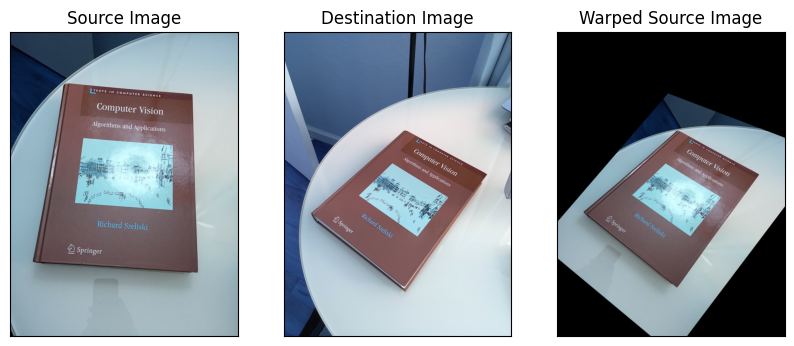

In [2]:
# Read source image.
im_src = cv2.imread('img/book2.jpg')
# Four corners of the book in source image
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]]) # x1, y1, z1 (the upper left corner of the book)

# Read destination image.
im_dst = cv2.imread('img/book1.jpg')
# Four corners of the book in destination image.
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]]) # x2, y2, z2 (the same upper left corner of the book)

# Calculate Homography
h, status = cv2.findHomography(pts_src, pts_dst)

# Warp source image to destination based on homography
im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))

f, (ax_src, ax_dst, ax_out) = plt.subplots(1, 3, figsize = (10, 5))
ax_src.imshow(im_src)
ax_src.set_title("Source Image")

ax_dst.imshow(im_dst)
ax_dst.set_title("Destination Image")

ax_out.imshow(im_out)
ax_out.set_title("Warped Source Image")

plt.setp([ax_src, ax_dst, ax_out], xticks = [], yticks = []) # Remove axis ticks
plt.show()

### Affine vs Linear transformation

A linear transformation is any transformation $f:U→V$ between vector spaces over $F$ for which:
* $f(x+y)=f(x)+f(y)$
* $f(αx)=αf(x)$

for all $x,y∈U$ and all $α∈F$.

An **affine transformation** is any transformation $f:U→V$ for which, if $\sum_{i}λ_i=1$,
$$ f(\sum_{i}λ_i x_i)=\sum_{i}λ_i f(xi) $$

for all sets of vectors $x_i ∈ U$.

In effect, what these two definitions mean is:

* All linear transformations are affine transformations.
* Not all affine transformations are linear transformations.
* It can be shown that any affine transformation $A:U→V$ can be written as $A(x)=L(x)+v_0$, where $v_0$ is some vector from $V$ and $L:U→V$ is a linear transformation.

#### Summary
In other words, a linear function fixes the origin, whereas an affine function need not do so. An affine function is the composition of a linear function with a **translation**, so while the linear part fixes the origin, the translation can map it somewhere else.

Linear functions between vector spaces preserve the vector space structure (so in particular they must fix the origin). While affine functions don't preserve the origin, they do preserve some of the other geometry of the space, such as the collection of straight lines.

If you choose bases for vector spaces $V$ and $W$ of dimensions $m$ and $n$ respectively, and consider functions $f:V→W$, then $f$ is linear if $f(v)=Av$ for some $n×m$ matrix $A$ and $f$ is affine if $f(v)=Av+b$ for some matrix $A$ and vector $b$.